Now let's try to use a pictorial dataset and try to predict what is in it. This will be a very basic computer vision problem.

In [3]:
# Importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

We will use Fashion MNIST dataset which is a collection of grayscale images of 28x28 pixels and are of clothing images. Each image is associated with a label and there are 10 labels in total. That is the target has 10 different classes ranging from 0 to 9. This dataset is available in the tf.keras.datasets API so can make use of this API to call and download the data and use it. There are multiple datasets to use as you will see from here - https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [4]:
fmnist = tf.keras.datasets.fashion_mnist
fmnist

<module 'keras.api.datasets.fashion_mnist' from 'E:\\7. Deep Learning\\venv\\lib\\site-packages\\keras\\api\\datasets\\fashion_mnist\\__init__.py'>

The output shows you the fashion mnist dataset module getting called from the location as given. Now you need to use load_data() method which will give two tuples with two lists each. The tuples are the training and the testing values. Each tuple has clothing items images and their labels. Let's see -

In [5]:
(training_images, training_labels), (testing_images, testing_labels) = fmnist.load_data()

In [6]:
# Let's check the shape
print('Shape of training images - ', training_images.shape)
print('Shape of training labels - ', training_labels.shape)
print('Shape of testing images - ', testing_images.shape)
print('Shape of testing labels - ', testing_labels.shape)

Shape of training images -  (60000, 28, 28)
Shape of training labels -  (60000,)
Shape of testing images -  (10000, 28, 28)
Shape of testing labels -  (10000,)


So there are 60,000 training images and each image is of 28 by 28 pixels. So its a 3D dataset that has the first dimension as the number of records present and the other two dimensions are defining the picture height and width. Similarly there are 10,000 testing images.

Label of the Image -   4
Pixels of the Image in Array format -  
 [[  0   0   0   0   0   0   0   5   1   0   0 136 216 204 212 176   0   0   0   2   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   5   1   0   0   0  74 250 249 245 248 235 115  10   0   0   0   4   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0  26 135 226 244 202 237 252 247 206 211 242 208 113   0   0   0   1   0   0   0   0]
 [  0   0   0   3   0  28 158 211 208 192 183 191 211 235 217 187 185 188 199 212 198 109   0   0   0   0   0   0]
 [  0   0   0   0   0 197 215 182 180 178 181 180 182 162 174 182 185 187 184 181 189 220  73   0   5   0   0   0]
 [  0   0   0   0  94 218 178 185 185 188 182 186 183 216 192 186 188 189 192 183 179 191 165   0   0   0   0   0]
 [  0   0   0   0 167 205 184 184 197 190 184 189 182 199 189 183 180 183 191 193 187 185 198   9   0   0   0   0]
 [  0   0   0   0 192 204 185 205 201 187 182 183 181 192 188 186 180 180 195 187 189 187 208  55   0   0   0   0]
 [  0   0   0 

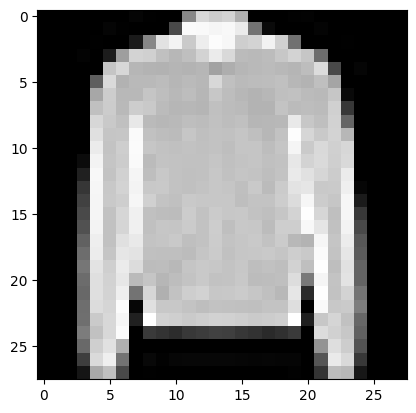

In [7]:
# Let's check how the image looks like

random_number = np.random.randint(0, 59999) # It will generate a single number between the given range
np.set_printoptions(linewidth=200) # Specifying the number of characters per row while printing

print('Label of the Image -  ', training_labels[random_number])  #Looking at the label from the random number generated
print('Pixels of the Image in Array format -  \n', training_images[random_number])

plt.imshow(training_images[random_number])  # Looking into the image
plt.gray()
plt.show()

It looks like a tshirt. Notice that the numbers of pixels in the array is in between 0 and 255. You need to scale the values between 0 and 1 as that will make the model learn better. This process is called normalization.

In [8]:
training_images = training_images/255.0
testing_images = testing_images/255.0

In [9]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
# It's important to have equal representation of the data in training and testing set. Let's check

label_frequency_in_training = dict(Counter(training_labels))
label_frequency_in_testing = dict(Counter(testing_labels))

In [11]:
label_frequency_in_testing

{9: 1000,
 2: 1000,
 1: 1000,
 6: 1000,
 4: 1000,
 5: 1000,
 7: 1000,
 3: 1000,
 8: 1000,
 0: 1000}

In [12]:
label_frequency_in_training

{9: 6000,
 0: 6000,
 3: 6000,
 2: 6000,
 7: 6000,
 5: 6000,
 1: 6000,
 6: 6000,
 4: 6000,
 8: 6000}

So we can see that testing data has every class present in the training set. There is an equal representation of the data. Now we have seen the dataset and the dataset is normalized as well. We are ready to use it. We will define the model first -

In [13]:
model = tf.keras.models.Sequential([
            tf.keras.Input(shape=(28,28,1)),  # Since shape of every image is 28 by 28 pixel and 1 stands for the color which is gray here
            tf.keras.layers.Flatten(), # We need to use this layer to convert it into 1 dimensional array 
            tf.keras.layers.Dense(units=128, activation='relu'),  # Using 1 layer of Dense layer with 128 neurons and relu activation
            tf.keras.layers.Dense(units=10, activation='softmax') # Using 1 layer of Dense layer with 10 neurons and softmax activation
        ])

Activation function tells the model about what to do. We haven't specified this activation function in the previous codes. This neural network has 3 layers - First is the flatten layer, then the Dense layer with 128 neurons and relu activation function, the last layer is the Dense layer with softmax activation function and has 10 neurons. In the last layer, the number of neurons should be equal to that of the number of classes in the target (which is 10 in this case).

An activation function introduces non-linearity into a neural network, allowing it to learn complex patterns. It decides whether a neuron should be activated based on its input. Two of the activation functions used above are -<br/>
 <ol> <li> ReLU (Rectified Linear Unit) - Common in hidden layers to prevent vanishing gradients and improve training speed. 
<ul> <li>Formula: f(x)=max(0,x) </li>
<li>How it Works: Outputs x if positive, else 0. </li></ul> </li> <br/>
<li> Softmax function - 
<ul> <li>Softmax converts logits into probabilities that sum to 1. Used in the final layer of multi-class classification models usually.</li></ul> </li> </ol>

Let's check how the activation functions works in code -

In [14]:
# we will take an array
inputs = np.array([-1.0, 0, -2.0, 1.0, 3.0, 4.0, 2.0])
outputs = tf.keras.activations.relu(inputs) 
outputs.numpy()

array([0., 0., 0., 1., 3., 4., 2.])

Here you can see that the 0 and positive numbers passed through as it is but the negative numbers are turned to 0. This is what relu activation is.

In [16]:
# Let's check for softmax now. We will take same array
inputs = np.array([[-1.0, 0, -2.0, 1.0, 3.0, 4.0, 2.0]])

# Softmax functions requires array to be 2D and of tensor type. So you need to convert the array into a tensor
inputs = tf.convert_to_tensor(inputs)

#print(inputs)

outputs = tf.keras.activations.softmax(inputs) 
outputs.numpy()

array([[0.00426308, 0.01158826, 0.0015683 , 0.03150015, 0.2327564 , 0.6326975 , 0.0856263 ]])

In [17]:
# Softmax gives probability scores attached to each number and the higher number will get higher score

total = tf.reduce_sum(outputs)  # Output is a tensor and this is to get the sum of all the values in the tensor
total

<tf.Tensor: shape=(), dtype=float64, numpy=0.9999999999999999>

So the total is close to 1, which is correct as total probability cannot be greater than 1.

In [18]:
# Since the highest number gets the highest probability, that will be our prediction

prediction_value = np.argmax(outputs)  # Getting the index of the highest value in the output
prediction_value

5

In [19]:
# So the result is 

inputs[0][prediction_value].numpy()  # Result at the position of 5

4.0

Okay, now we know how the activation functions are working. Let's compile the model -

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

We could have written the above as - <br/>
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy']) <br/>
Now accuracy is used as a metric, which will show the accuracy value at each epoch besides the loss value. All images will go through the network, that is through all the neurons, for 10 times as specified in epoch. The final loss and accuracy can be seen at the last epoch.

In [21]:
# Now the model training part
model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7796 - loss: 0.6387
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8642 - loss: 0.3824
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8787 - loss: 0.3331
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8847 - loss: 0.3149
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8951 - loss: 0.2901
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8967 - loss: 0.2780
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8992 - loss: 0.2669
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9041 - loss: 0.2593
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9081 - loss: 0.2464
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9108 - loss: 0.2385


Our model is 91.21% accurate in guessing the images as per the labels. Now how will it perform on unseen data? In order to measure that, we have evaluate method.

In [22]:
model.evaluate(testing_images, testing_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8834 - loss: 0.3312


[0.334062784910202, 0.8824999928474426]

The accuracy here is around 88%, which is less than the training accuracy. Let's try predicting an image from test set

In [23]:
predictions = model.predict(testing_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [24]:
print(predictions[100]) 

[7.4305269e-04 6.3614880e-07 2.6898239e-05 9.9857926e-01 2.4119647e-06 4.6222468e-08 6.4739137e-04 1.2863491e-10 3.2082983e-07 4.2897124e-08]


Prediction shows the probability that the image at index 100 is having for each of the 10 classes. We will get the argument for the maximum value out of it -

In [25]:
np.argmax(predictions[100])  # It belongs to class 3.

3

In [26]:
testing_labels[100]  # Thus we can see our prediction is right here

3

<h3>So what you did here? </h3><br/>
<ol>
    <li> Used the Fashion Mnist dataset </li>
    <li> Looked into the basic data details </li>
    <li> Normalized the data </li>
    <li> You created the model architecture with - <ol>
        <li>Input layer for the incoming data</li>
        <li>a Flatten layer</li>
        <li>2 dense neural network layers with 128 neurons and 10 neurons alongwith activation functions </li></ol></li>
    <li> Compiled the model with loss and optimizer </li>
    <li> Fitted the model with training data </li>
    <li> Evaluated the model with test data </li>
    <li> Predicted on the trained model </li>
    </ol>